<a href="https://colab.research.google.com/github/sim-so/HandsOnML/blob/main/03_Classification_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류 연습문제

## 기본 라이브러리

In [1]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import warnings

In [2]:
seed = 27
random.seed = seed
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# 1 MNIST 데이터셋으로 분류 정확도 97% 달성하기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [ ]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=False)

In [ ]:
kn_base = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=4, random_state=seed, shuffle=True)

In [ ]:
param_grid = {
    "n_neighbors":[10, 15, 20, 25, 30],
    "weights":['uniform', 'distance']
}

In [ ]:
kn_clf = GridSearchCV(kn_base, param_grid=param_grid, cv=skf, scoring='accuracy', verbose=2)

In [ ]:
kn_clf.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] END ....................n_neighbors=10, weights=uniform; total time=  43.3s
[CV] END ....................n_neighbors=10, weights=uniform; total time=  47.5s
[CV] END ....................n_neighbors=10, weights=uniform; total time=  47.9s
[CV] END ....................n_neighbors=10, weights=uniform; total time=  45.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=  45.2s
[CV] END ...................n_neighbors=10, weights=distance; total time=  43.1s
[CV] END ...................n_neighbors=10, weights=distance; total time=  43.3s
[CV] END ...................n_neighbors=10, weights=distance; total time=  42.7s
[CV] END ....................n_neighbors=15, weights=uniform; total time=  42.7s
[CV] END ....................n_neighbors=15, weights=uniform; total time=  44.4s
[CV] END ....................n_neighbors=15, weights=uniform; total time=  45.0s
[CV] END ....................n_neighbors=15, wei

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=27, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 15, 20, 25, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [ ]:
kn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [ ]:
pred = kn_clf.predict(X_test)
score = accuracy_score(y_test, pred)

In [ ]:
score

0.9684

In [ ]:
param_grid = {
    "n_neighbors":[6, 8, 10, 12],
    "weights":['uniform']
}
kn_clf = GridSearchCV(kn_base, param_grid=param_grid, cv=skf, scoring='accuracy', verbose=3)
kn_clf.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4] END ....n_neighbors=6, weights=uniform;, score=0.966 total time=  45.4s
[CV 2/4] END ....n_neighbors=6, weights=uniform;, score=0.972 total time=  48.5s
[CV 3/4] END ....n_neighbors=6, weights=uniform;, score=0.968 total time=  44.4s
[CV 4/4] END ....n_neighbors=6, weights=uniform;, score=0.967 total time=  44.4s
[CV 1/4] END ....n_neighbors=8, weights=uniform;, score=0.965 total time=  47.6s
[CV 2/4] END ....n_neighbors=8, weights=uniform;, score=0.970 total time=  43.0s
[CV 3/4] END ....n_neighbors=8, weights=uniform;, score=0.967 total time=  44.4s
[CV 4/4] END ....n_neighbors=8, weights=uniform;, score=0.966 total time=  44.5s
[CV 1/4] END ...n_neighbors=10, weights=uniform;, score=0.963 total time=  44.2s
[CV 2/4] END ...n_neighbors=10, weights=uniform;, score=0.968 total time=  44.2s
[CV 3/4] END ...n_neighbors=10, weights=uniform;, score=0.966 total time=  46.0s
[CV 4/4] END ...n_neighbors=10, weights=uniform;,

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=27, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [6, 8, 10, 12], 'weights': ['uniform']},
             scoring='accuracy', verbose=3)

In [ ]:
kn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=6)

In [ ]:
pred = kn_clf.predict(X_test)
score = accuracy_score(y_test, pred)
score

0.9677

In [ ]:
param_grid = {
    "n_neighbors":[3, 4, 5, 6],
    "weights":['uniform']
}
kn_clf = GridSearchCV(kn_base, param_grid=param_grid, cv=skf, scoring='accuracy', verbose=3)
kn_clf.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  41.4s
[CV 2/4] END ....n_neighbors=3, weights=uniform;, score=0.973 total time=  43.0s
[CV 3/4] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  40.2s
[CV 4/4] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  39.5s
[CV 1/4] END ....n_neighbors=4, weights=uniform;, score=0.968 total time=  44.0s
[CV 2/4] END ....n_neighbors=4, weights=uniform;, score=0.972 total time=  44.1s
[CV 3/4] END ....n_neighbors=4, weights=uniform;, score=0.968 total time=  44.3s
[CV 4/4] END ....n_neighbors=4, weights=uniform;, score=0.970 total time=  46.9s
[CV 1/4] END ....n_neighbors=5, weights=uniform;, score=0.968 total time=  44.3s
[CV 2/4] END ....n_neighbors=5, weights=uniform;, score=0.973 total time=  44.4s
[CV 3/4] END ....n_neighbors=5, weights=uniform;, score=0.969 total time=  44.4s
[CV 4/4] END ....n_neighbors=5, weights=uniform;,

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=27, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6], 'weights': ['uniform']},
             scoring='accuracy', verbose=3)

In [ ]:
kn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = kn_clf.predict(X_test)
score = accuracy_score(y_test, pred)
score

0.9705

# 2 MNIST 이미지 증강
상하좌우 어느 방향으로든 한 픽셀 이동시키고, 생성된 이미지를 훈련세트에 추가하여 모델 훈련하기

In [ ]:
def mnist_shift(images, pos):
    images_2d = images.reshape(-1, 28, 28)
    x, y = pos
    x_l, x_r, y_l, y_r = None, None, None, None
    if x > 0: 
        x_r = -x 
    else: x_l = -x
    if y > 0:
        y_r = -y
    else: y_l = -y
    pad_width = ((0, 0), (max(x, 0), np.abs(min(x, 0))), ((max(y, 0)), np.abs(min(y, 0))))
    shifted_images = np.pad(images_2d[:, x_l:x_r, y_l:y_r], pad_width=pad_width, mode="constant", constant_values=[0])
    return shifted_images.reshape(-1, 784)

In [ ]:
shift_1 = mnist_shift(X_train, (1, 0))
shift_2 = mnist_shift(X_train, (-1, 0))
shift_3 = mnist_shift(X_train, (0, 1))
shift_4 = mnist_shift(X_train, (0, -1))

In [ ]:
X_train_ag = np.concatenate((X_train, shift_1, shift_2, shift_3, shift_4))

In [ ]:
X_train_ag.shape

(300000, 784)

In [ ]:
y_train_ag = np.concatenate((y_train, y_train, y_train, y_train, y_train))

In [ ]:
y_train_ag.shape

(300000,)

In [ ]:
kn_clf.best_estimator_.fit(X_train_ag, y_train_ag)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = kn_clf.predict(X_test)
score = accuracy_score(y_test, pred)
score

0.9756

In [ ]:
gc.collect()

938

# 3 Titanic

### 데이터셋 다운로드

In [382]:
titanic_train = pd.read_csv("/content/titanic/train.csv")
titanic_test = pd.read_csv("/content/titanic/test.csv")
titanic_submission = pd.read_csv("/content/titanic/gender_submission.csv")

In [340]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [341]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [342]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [392]:
titanic_train[titanic_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


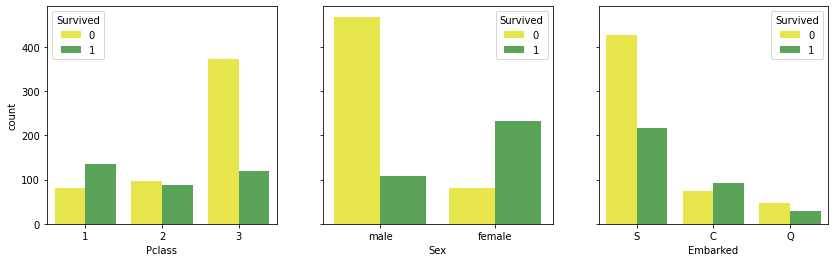

In [393]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4), sharey=True)
sns.countplot(data=titanic_train, x="Pclass", hue="Survived", palette="Set1_r", ax=axes[0])
sns.countplot(data=titanic_train, x="Sex", hue="Survived", palette="Set1_r", ax=axes[1])
sns.countplot(data=titanic_train, x="Embarked", hue="Survived", palette="Set1_r", ax=axes[2])
axes[1].set_ylabel("")
axes[2].set_ylabel("")
plt.show()

### Feature Engineering

In [394]:
titanic_train["Initial"] = titanic_train["Name"].str.extract('([A-Za-z+]+)\.')

In [395]:
pd.crosstab(titanic_train["Initial"], titanic_train["Sex"])

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [396]:
titanic_train.pivot_table(index=["Initial"], values=["Age", "Survived"], aggfunc="mean")

,Age,Survived
Initial,,
Capt,70.000000,0.000000
Col,58.000000,0.500000
Countess,33.000000,1.000000
Don,40.000000,0.000000
Dr,42.000000,0.428571
Jonkheer,38.000000,0.000000
Lady,48.000000,1.000000
Major,48.500000,0.500000
Master,4.574167,0.575000


In [397]:
titanic_train["Title"] = titanic_train["Initial"].replace(["Capt", "Col", "Don", "Jonkheer", "Major", "Rev", "Dr",
                                                            "Countess", "Lady", "Mme", "Mlle", "Ms"], 
                                                          ["Sir", "Sir", "Sir", "Sir", "Sir", "Sir", "Sir",
                                                            "Mrs", "Mrs", "Mrs", "Miss", "Miss"])

In [398]:
titanic_train["Title"].value_counts()

Mr        517
Miss      185
Mrs       128
Master     40
Sir        21
Name: Title, dtype: int64

In [399]:
title_age = titanic_train.groupby("Title")["Age"].mean()
title_age

Title
Master     4.574167
Miss      21.845638
Mr        32.368090
Mrs       35.873874
Sir       46.050000
Name: Age, dtype: float64

In [400]:
titanic_train["FamilySize"] = titanic_train["SibSp"] + titanic_train["Parch"]

In [401]:
titanic_train["FamilySize"].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

In [402]:
titanic_train.groupby("FamilySize")["Survived"].mean()

FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [403]:
titanic_train["Alone"] = (titanic_train["FamilySize"] == 0).astype(int)

In [404]:
titanic_train.loc[titanic_train["Embarked"].isnull(), "Embarked"] = "S"

In [405]:
titanic_train.loc[(titanic_train["Age"].isnull()) & (titanic_train["Title"] == "Sir"), "Age"] = np.round(title_age["Sir"])
titanic_train.loc[(titanic_train["Age"].isnull()) & (titanic_train["Title"] == "Master"), "Age"] = np.round(title_age["Master"])
titanic_train.loc[(titanic_train["Age"].isnull()) & (titanic_train["Title"] == "Mrs"), "Age"] = np.round(title_age["Mrs"])
titanic_train.loc[(titanic_train["Age"].isnull()) & (titanic_train["Title"] == "Miss"), "Age"] = np.round(title_age["Miss"])
titanic_train.loc[(titanic_train["Age"].isnull()) & (titanic_train["Title"] == "Mr"), "Age"] = np.round(title_age["Mr"])

In [406]:
titanic_train["Age_Band"] = 0
titanic_train.loc[titanic_train["Age"] > 16, "Age_Band"] = 1
titanic_train.loc[titanic_train["Age"] > 32, "Age_Band"] = 2
titanic_train.loc[titanic_train["Age"] > 48, "Age_Band"] = 3
titanic_train.loc[titanic_train["Age"] > 64, "Age_Band"] = 4

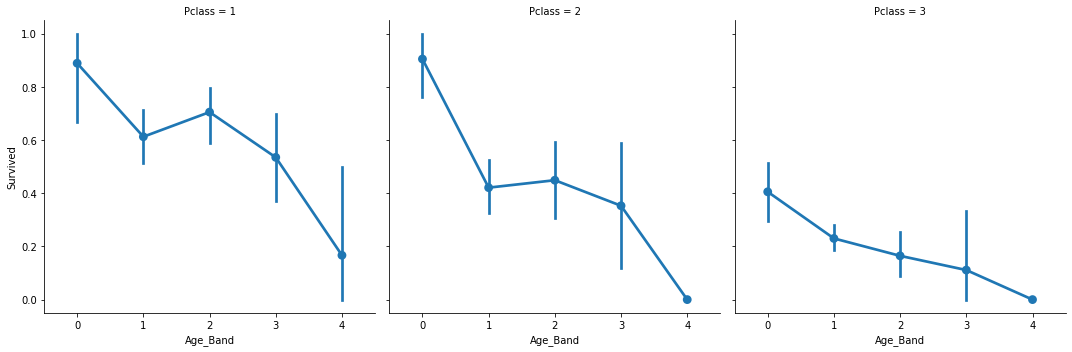

In [407]:
sns.catplot(data=titanic_train, x="Age_Band", y="Survived", col="Pclass", kind="point")
plt.show()

In [408]:
titanic_train["Fare_Band"] = pd.qcut(titanic_train["Fare"], 4)
titanic_train.groupby("Fare_Band")["Survived"].mean()

Fare_Band
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [409]:
titanic_train["Fare_Band"] = 0
titanic_train.loc[titanic_train["Fare"] > 7.91, "Fare_Band"] = 1
titanic_train.loc[titanic_train["Fare"] > 14.454, "Fare_Band"] = 2
titanic_train.loc[titanic_train["Fare"] > 31, "Fare_Band"] = 3

### Preprocessing

In [410]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Initial      891 non-null    object 
 13  Title        891 non-null    object 
 14  FamilySize   891 non-null    int64  
 15  Alone        891 non-null    int64  
 16  Age_Band     891 non-null    int64  
 17  Fare_Band    891 non-null    int64  
dtypes: float64(2), int64(9), object(7)
memory usage: 1

In [411]:
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin", "Initial"]
cat_cols = ["Pclass", "Sex", "Embarked", "Title", "Age_Band", "Fare_Band", "Alone"]
num_cols = ["FamilySize"]

In [412]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([("scaler", StandardScaler())])
cat_pipeline = Pipeline([("cat_encoder", OneHotEncoder())])
prep_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_cols)])

In [413]:
X = prep_pipeline.fit_transform(titanic_train[cat_cols])

In [414]:
y = titanic_train["Survived"]

### Model

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [367]:
classifiers = [
    SVC(kernel="linear", probability=True),
    SVC(kernel="rbf", probability=True),
    SVC(kernel="poly", probability=True),
    SVC(kernel="sigmoid", probability=True),
    RandomForestClassifier(),
    SGDClassifier(),
    KNeighborsClassifier(3),
    LogisticRegression()
]

In [368]:
model_data = dict()
for clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
    model_data[str(clf)] = scores
    print(f"{str(clf)} : {scores} / mean {np.mean(scores)}")

SVC(kernel='linear', probability=True) : [0.77777778 0.82022472 0.74157303 0.86516854 0.79775281 0.78651685
 0.7752809  0.74157303 0.83146067 0.78651685] / mean 0.7923845193508114
SVC(probability=True) : [0.83333333 0.80898876 0.76404494 0.84269663 0.85393258 0.82022472
 0.83146067 0.76404494 0.86516854 0.83146067] / mean 0.8215355805243446
SVC(kernel='poly', probability=True) : [0.75555556 0.83146067 0.74157303 0.83146067 0.85393258 0.84269663
 0.83146067 0.7752809  0.88764045 0.83146067] / mean 0.8182521847690387
SVC(kernel='sigmoid', probability=True) : [0.7        0.69662921 0.59550562 0.6741573  0.71910112 0.68539326
 0.68539326 0.74157303 0.74157303 0.71910112] / mean 0.6958426966292135
RandomForestClassifier() : [0.76666667 0.83146067 0.74157303 0.83146067 0.87640449 0.82022472
 0.84269663 0.78651685 0.87640449 0.83146067] / mean 0.8204868913857679
SGDClassifier() : [0.67777778 0.80898876 0.64044944 0.84269663 0.78651685 0.80898876
 0.78651685 0.76404494 0.83146067 0.80898876] /

In [369]:
model_data_df = pd.DataFrame(model_data).T

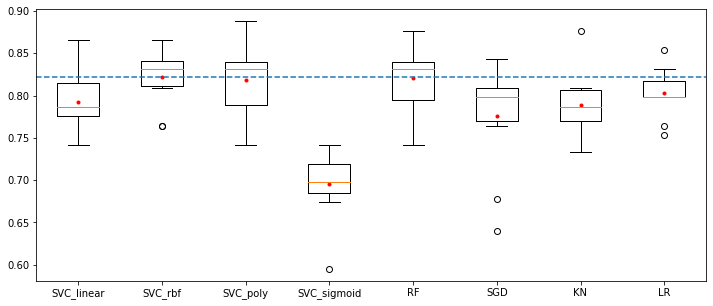

In [370]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.boxplot(model_data_df, labels=["SVC_linear", "SVC_rbf", "SVC_poly", "SVC_sigmoid", "RF", "SGD", "KN", "LR"])
plt.plot(range(1, 9), model_data_df.mean(axis=1), "r.")
ax.axhline(model_data_df.mean(axis=1).max(), ls='--')
plt.show()

In [371]:
model_data_df.mean(axis=1)

SVC(kernel='linear', probability=True)     0.792385
SVC(probability=True)                      0.821536
SVC(kernel='poly', probability=True)       0.818252
SVC(kernel='sigmoid', probability=True)    0.695843
RandomForestClassifier()                   0.820487
SGDClassifier()                            0.775643
KNeighborsClassifier(n_neighbors=3)        0.789064
LogisticRegression()                       0.802472
dtype: float64

In [417]:
def clean_data(data):
    data["Initial"] = data["Name"].str.extract('([A-Za-z+]+)\.')
    data["Title"] = data["Initial"].replace(["Capt", "Col", "Don", "Jonkheer", "Major", "Rev", "Dr", "Dona"], "Sir")
    data["Title"] = data["Title"].replace(["Countess", "Lady", "Mme"], "Mrs")
    data["Title"] = data["Title"].replace(["Mlle", "Ms"], "Miss")

    data["FamilySize"] = data["SibSp"] + data["Parch"]
    data["Alone"] = (data["FamilySize"] == 0).astype(int)

    data.loc[data["Embarked"].isnull(), "Embarked"] = "S"
    
    for title in title_age.index:
        data.loc[(data["Age"].isnull()) & (data["Title"] == title), "Age"] = np.round(title_age[title])
    data["Age_Band"] = 0
    for i in range(1, 5):
        data.loc[data["Age"] > 16 * i, "Age_Band"] = i

    data["Fare"] = data["Fare"].fillna(data["Fare"].median())

    data["Fare_Band"] = 0
    data.loc[data["Fare"] > 7.91, "Fare_Band"] = 1
    data.loc[data["Fare"] > 14.454, "Fare_Band"] = 2
    data.loc[data["Fare"] > 31, "Fare_Band"] = 3

    return data

In [418]:
titanic_train["Title"].value_counts()

Mr        517
Miss      185
Mrs       128
Master     40
Sir        21
Name: Title, dtype: int64

In [419]:
X_test = clean_data(titanic_test)

In [420]:
X_test = prep_pipeline.transform(X_test)

In [421]:
best_clf = SVC(kernel="rbf", probability=True)
best_clf.fit(X, y)
pred = best_clf.predict(X_test)

In [427]:
sum(titanic_submission["Survived"] == pred)/len(titanic_submission)

0.8875598086124402

In [428]:
titanic_submission["Survived"] = pred

In [429]:
titanic_submission.to_csv('/content/submission.csv', index=False)

# 4 스팸 분류기

In [3]:
import os
import urllib.request
import tarfile

home_url = "https://spamassassin.apache.org/old/publiccorpus/"
tar_files = ["20030228_easy_ham.tar.bz2", "20030228_easy_ham_2.tar.bz2", "20030228_hard_ham.tar.bz2", "20030228_spam.tar.bz2", "20030228_spam_2.tar.bz2"]
spam_path = "/content/spams"

In [4]:
if not os.path.isdir(spam_path):
    os.makedirs(spam_path)
for file_name in tar_files:
    url = home_url + file_name
    file_path = os.path.join(spam_path, file_name)
    urllib.request.urlretrieve(url, file_path)
    tar_file = tarfile.open(file_path)
    tar_file.extractall(path=spam_path)
    tar_file.close()

In [8]:
spam_folders = [name for name in sorted(os.listdir(spam_path)) if not name.endswith(".bz2")]
spam_folders

['easy_ham', 'easy_ham_2', 'hard_ham', 'spam', 'spam_2']

In [9]:
import email
import email.policy

def load_email(folder_name, file_name, spam_path=spam_path):
    with open(os.path.join(spam_path, folder_name, file_name), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

def load_emails(folder_name, spam_path=spam_path):
    folder_dir = os.path.join(spam_path, folder_name)
    file_names = [name for name in sorted(os.listdir(folder_dir)) if len(name) > 20]
    emails = [load_email(folder_name, file_name=name) for name in file_names]
    return emails

In [11]:
ham_1 = load_emails("easy_ham")
ham_2 = load_emails("easy_ham_2")
ham_3 = load_emails("hard_ham")
spam_1 = load_emails("spam")
spam_2 = load_emails("spam_2")

In [14]:
print(len(ham_1), len(ham_2), len(ham_3), len(spam_1), len(spam_2))

2500 1400 250 500 1397


In [12]:
help(ham_1[0])

Help on EmailMessage in module email.message object:

class EmailMessage(MIMEPart)
 |  EmailMessage(policy=None)
 |  
 |  Basic message object.
 |  
 |  A message object is defined as something that has a bunch of RFC 2822
 |  headers and a payload.  It may optionally have an envelope header
 |  (a.k.a. Unix-From or From_ header).  If the message is a container (i.e. a
 |  multipart or a message/rfc822), then the payload is a list of Message
 |  objects, otherwise it is a string.
 |  
 |  Message objects implement part of the `mapping' interface, which assumes
 |  there is exactly one occurrence of the header per message.  Some headers
 |  do in fact appear multiple times (e.g. Received) and for those headers,
 |  you must use the explicit API to set or get all the headers.  Not all of
 |  the mapping methods are implemented.
 |  
 |  Method resolution order:
 |      EmailMessage
 |      MIMEPart
 |      Message
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  set_conten

In [15]:
print(ham_1[0].get_content().strip())

Date:        Wed, 21 Aug 2002 10:54:46 -0500
    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>


  | I can't reproduce this error.

For me it is very repeatable... (like every time, without fail).

This is the debug log of the pick happening ...

18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}
18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury
18:19:04 Ftoc_PickMsgs {{1 hit}}
18:19:04 Marking 1 hits
18:19:04 tkerror: syntax error in expression "int ...

Note, if I run the pick command by hand ...

delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury
1 hit

That's where the "1 hit" comes from (obviously).  The version of nmh I'm
using is ...

delta$ pick -version
pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 14:55:56 

In [16]:
print(ham_1[0].get_body())

Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org
 [66.187.233.211]) by    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id
 g7MBYrZ04811 for    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002
 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain
 [127.0.0.1]) by    listman.redhat.com (Postfix) with ESMTP id 8386540858;
 Thu, 22 Aug 2002    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp.spamassassin.taint.org
 (int-mx1.corp.spamassassin.taint.or

In [17]:
print(ham_1[0].get_payload())

    Date:        Wed, 21 Aug 2002 10:54:46 -0500
    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>


  | I can't reproduce this error.

For me it is very repeatable... (like every time, without fail).

This is the debug log of the pick happening ...

18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}
18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury
18:19:04 Ftoc_PickMsgs {{1 hit}}
18:19:04 Marking 1 hits
18:19:04 tkerror: syntax error in expression "int ...

Note, if I run the pick command by hand ...

delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury
1 hit

That's where the "1 hit" comes from (obviously).  The version of nmh I'm
using is ...

delta$ pick -version
pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 14:55

In [18]:
ham_1[0].get_content_type()

'text/plain'

In [19]:
ham_1[0].items()

[('Return-Path', '<exmh-workers-admin@spamassassin.taint.org>'),
 ('Delivered-To', 'zzzz@localhost.netnoteinc.com'),
 ('Received',
  'from localhost (localhost [127.0.0.1])\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)'),
 ('Received',
  'from phobos [127.0.0.1]\tby localhost with IMAP (fetchmail-5.9.0)\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)'),
 ('Received',
  'from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100'),
 ('Received',
  'from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002    07:35:02 -0400 (EDT)'),
 ('Delivered-To', 'exmh-workers@listman.spamassassin.taint.org'),
 ('Received',
  'from int-mx

In [20]:
from sklearn.model_selection import train_test_split

In [24]:
X = np.array(ham_1 + ham_2 + ham_3 + spam_1 + spam_2, dtype=object)
y = np.array([0] * (len(ham_1) + len(ham_2) + len(ham_3)) + [1] * (len(spam_1) + len(spam_2)))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [26]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email) for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [29]:
html_emails = [email for email in X_train if get_email_structure(email) == "text/html"]

In [33]:
print(html_emails[0].get_content().strip()[:1000], "...")

<!-- saved from url=(0022)http://internet.e-mail -->
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head>
	<title>NO MONEY Down Merchant Accounts!</title>
</head>
<style type="text/css">.main {  font-family: Verdana, Arial, Helvetica, sans-serif; font-size: 12px; color: #000080}
.footer {  font-family: Verdana, Arial, Helvetica, sans-serif; font-size: 10px; color: #000000}
A:link {text-decoration: none; color: #0808F1}
A:visited {text-decoration: none; color: #0808F1}
A:active {text-decoration: none; color: #FF0000}
A:hover {text-decoration: none; color: #1B3351}</style>

<body topmargin="4" leftmargin="4"><table width="500" align="center" cellspacing="0" cellpadding="2"  border="1" bordercolor="#1A1929">
<tr>
	<td><table width="496" bgcolor="#E0E9F1" border="0">
<tr>
	<td><table>
<tr>
	<td><img src="http://61.129.81.74/images/add1.1.gif" alt="" width="101" height="140" border="0"></td>
    <td align="justify" valign="top" class="main"><strong><font size="4" fa

In [45]:
from bs4 import BeautifulSoup as bs
import re

In [295]:
# https://docs.python.org/ko/3/library/re.html?highlight=re#flags
def html_to_plain_text(html):
    text = bs(html, "html.parser").get_text()
    text = re.sub(r'\..*?\{.*?\}', '', text, flags=re.M|re.S|re.I)
    text = re.sub(r'A\:.*?\{.*?\}', '', text, flags=re.M|re.S|re.I)
    text = re.sub('<.*?>', '', text, flags=re.M|re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M|re.S)
    text = re.sub(r'(\s*\s)+', ' ', text, flags=re.M|re.S)
    text = text.replace(u'\xa0', u' ')
    return text

In [296]:
sample_content = html_emails[0].get_content()
sample_ps = bs(sample_content, 'html.parser').get_text()
sample_ps

"\n\n\n\nNO MONEY Down Merchant Accounts!\n\n.main {  font-family: Verdana, Arial, Helvetica, sans-serif; font-size: 12px; color: #000080}\n.footer {  font-family: Verdana, Arial, Helvetica, sans-serif; font-size: 10px; color: #000000}\nA:link {text-decoration: none; color: #0808F1}\nA:visited {text-decoration: none; color: #0808F1}\nA:active {text-decoration: none; color: #FF0000}\nA:hover {text-decoration: none; color: #1B3351}\n\n\n\n\n\n\n\nNO MONEY Down Merchant Accounts!\nIf you own your own business, you're starting a new business or know someone who is... Being able to accept Major Credit Cards can make all the difference in the world!\nCLICK HERE\n\n\n\nJust the fact that you accept credit cards adds credibility to your business. Especially if you are a New, Small or Home Based Business.\nNo Payment For The First Month!\nSetup within 3-5 Days\nApproval is quick and our set up times range from 3 - 5 days. Guaranteed approval on all leases for equipment or software. Bad credit, 

In [297]:
html_to_plain_text(sample_content)

" NO MONEY Down Merchant Accounts! NO MONEY Down Merchant Accounts! If you own your own business, you're starting a new business or know someone who is... Being able to accept Major Credit Cards can make all the difference in the world! CLICK HERE Just the fact that you accept credit cards adds credibility to your business. Especially if you are a New, Small or Home Based Business. No Payment For The First Month! Setup within 3-5 Days Approval is quick and our set up times range from 3 - 5 days. Guaranteed approval on all leases for equipment or software. Bad credit, no credit, no problem! ACCEPT CREDIT CARDS ONLINE or OFFLINE !! CLICK HERE If you'd like to be removed from our mailing list, please click on the link below. We protect all email addresses from third parties. Thank you. Please remove me. "

In [278]:
sample_content = html_emails[2].get_content()
sample_ps = bs(sample_content, 'html.parser').get_text()
sample_ps

'\nBeautiful,Custom Websites for $399 Complete!\n\n\n\n\n\n\n\n\nBeautiful, 100% Custom \n      Websites, $399 Complete!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGet a beautiful, 100% Custom Web Site (or \n                        yours redesigned)\xa0for only \n                        $389!*We have references coast to \n                        coast\xa0and will give you plenty of sites to \n                        view!\nIncludes up to \n                  7 pages (you can add more), java rollover buttons, feedback \n                  forms, more. It will be constructed to your taste and \n                  specifications. We do not use templates,\xa0 our sites \n                  are completely custom.\xa0\xa0\xa0 *Must host with us @ \n                  $19.95/mo (100 Megs, 20 Email accounts, Control Panel, Front \n                  Page, Graphical Statistics, \n                  more).\xa0\nFor sites to \n                  view, complete below or call our message center at \n            

In [281]:
html_to_plain_text(sample_content)

" NO MONEY Down Merchant Accounts! NO MONEY Down Merchant Accounts! If you own your own business, you're starting a new business or know someone who is... Being able to accept Major Credit Cards can make all the difference in the world! CLICK HERE Just the fact that you accept credit cards adds credibility to your business. Especially if you are a New, Small or Home Based Business. No Payment For The First Month! Setup within 3-5 Days Approval is quick and our set up times range from 3 - 5 days. Guaranteed approval on all leases for equipment or software. Bad credit, no credit, no problem! ACCEPT CREDIT CARDS ONLINE or OFFLINE !! CLICK HERE If you'd like to be removed from our mailing list, please click on the link below. We protect all email addresses from third parties. Thank you. Please remove me. "

In [290]:
sample_content = html_emails[3].get_content()
sample_ps = bs(sample_content, 'html.parser').get_text()
sample_ps

"\n\n\n\n\nEmail Marketing\n\n<!--\n\t\t\tspan.bug { color: black; font-size: 9px; line-height: 9px; font-family: Arial, Helvetica, sans-serif }-->\n\n\n\n\n\n\n\n\n\nThe power of Email Marketing\n\n\n\n\n\nEmail Marketing is spreading\xa0around the whole\xa0world                   \n  because of its\xa0high effectiveness,\xa0                 \n  speed\xa0and\xa0low cost.\n\n\n\n                  \n  Now if you want to introduce and sell your product or service,\xa0look for                   \n  a\xa0partner to\xa0raise                   \n  your website's reputation. The best way would be for you\xa0to\xa0use\xa0email                   \n  to contact your        \n  targeted customer (of course,first,\xa0you\xa0have to\xa0know their email addresses). \n\n\n\n\nTargeted Email is no doubt very\xa0 effective.\xa0                   \n  If you can introduce your product or service\xa0                  \n  through\xa0email directly to the customers\xa0who are interested\xa0in               

In [291]:
html_to_plain_text(sample_content)

" Email Marketing The power of Email Marketing Email Marketing is spreading around the whole world because of its high effectiveness, speed and low cost. Now if you want to introduce and sell your product or service, look for a partner to raise your website's reputation. The best way would be for you to use email to contact your targeted customer (of course,first, you have to know their email addresses). Targeted Email is no doubt very effective. If you can introduce your product or service through email directly to the customers who are interested in them, this will bring your business a better chance of success. Xin.Lan Internet Marketing Center, has many years of experience in developing and utilizing internet resources.We have set up global business email-address databases which contain millions of email addresses of commercial enterprises and consumers all over the world. These emails are sorted by countries and fields. We also continuo- usly update our databases, add new addresse

In [264]:
def email_to_text(email):
    html = None
    for part in email.walk():
        content_type = part.get_content_type()
        if not content_type in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except:
            content = str(part.get_payload())
        if content_type == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [265]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [266]:
try:
    import nltk

    stemmer = nltk.PorterStemmer()
    for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
        print(word, "==>", stemmer.stem(word))
except ImportError:
    print("Error: stemming requires the NLTK module.")
    stemmer = None

Computations ==> comput
Computation ==> comput
Computing ==> comput
Computed ==> comput
Compute ==> comput
Compulsive ==> compuls


In [267]:
!pip install urlextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [268]:
try:
    import urlextract

    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [269]:
from collections import Counter
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordcounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True, replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r"\d+(?:\.\d*)?(?:[eE][+-]?\d+)?", "NUMBER", text)
            if self.remove_punctuation:
                text = re.sub(r"\W+", " ", text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [299]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size

    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self

    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [293]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordcounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'number': 7, 'i': 4, 'the': 4, 'been': 2, 'to': 2, 'about': 2, 'that': 2, 'chri': 2, 'url': 2, 'doer': 2, 've': 1, 'work': 1, 'on': 1, 'salari': 1, 'relat': 1, 'thing': 1, 'past': 1, 'few': 1, 'day': 1, 'but': 1, 'm': 1, 'start': 1, 'think': 1, 'exmh': 1, 'again': 1, 'thank': 1, 'robert': 1, 'for': 1, 'find': 1, 's': 1, 'l': 1, 'lineno': 1, 'bug': 1, 'so': 1, 'ha': 1, 'anybodi': 1, 'els': 1, 'look': 1, 'at': 1, 'perform': 1, 'issu': 1, 'we': 1, 'were': 1, 'talk': 1, 'befor': 1, 'left': 1, 'or': 1, 'should': 1, 'dig': 1, 'right': 1, 'in': 1, 'garrigu': 1, 'vircio': 1, 'congress': 1, 'suit': 1, 'austin': 1, 'tx': 1, 'world': 1, 'war': 1, 'iii': 1, 'wrong': 1, 'vs': 1, 'evil': 1}),
       Counter({'mysql': 5, 'to': 4, 'linux': 4, 'i': 3, 'use': 3, 'and': 3, 'librari': 3, 'a': 3, 'the': 3, 'under': 3, 'm': 2, 'project': 2, 'their': 2, 'anyon': 2, 'ha': 2, 'ani': 2, 'link': 2, 'c': 2, 'list': 2, 'ie': 2, 'hi': 1, 'go': 1, 'be': 1, 'in': 1, 'an': 1, 'upcom': 1, 'probabl': 1, 

In [300]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [301]:
X_few_vectors.toarray()

array([[61,  4,  2,  4,  7,  2,  0,  0,  2,  0,  0],
       [80,  3,  4,  3,  0,  0,  5,  3,  1,  3,  4],
       [56,  8,  5,  2,  0,  3,  0,  2,  1,  1,  0]])

In [302]:
vocab_transformer.vocabulary_

{'the': 1,
 'to': 2,
 'i': 3,
 'number': 4,
 'that': 5,
 'mysql': 6,
 'and': 7,
 'url': 8,
 'a': 9,
 'linux': 10}

In [303]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordcounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer())
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=5, verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.973) total time=   3.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV] END ................................ score: (test=0.971) total time=   3.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


[CV] END ................................ score: (test=0.987) total time=   2.9s
[CV] END ................................ score: (test=0.982) total time=   1.2s
[CV] END ................................ score: (test=0.971) total time=   2.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.2s finished


0.976847111711265

In [306]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)
y_pred = log_clf.predict(X_test_transformed)

print("Accuracy: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Accuracy96.34%
recall97.11%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [307]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 17.4 MB/s eta 0:00:00
